In [1]:
# ------ Import necessary packages ----
from collections import defaultdict

# from dwave.system.samplers import DWaveSampler
# from dwave.system.composites import EmbeddingComposite
import networkx as nx

import matplotlib
matplotlib.use("agg")
from matplotlib import pyplot as plt

#to run it on python notebook
%pylab inline  


Populating the interactive namespace from numpy and matplotlib


## Synthetic Data 

### Created a perturbated bipartipe graph
Below I implement a code to generate the synthetic data. I have implemented it slightly differently than in the notes of Des. I create N nodes, and put them into two lists: A and B. I loop through each elements of A and decide between 3 choices: 


* If $p<= 0.2$, then choose an other node j in A, and create a directed edge from i to j. A>A
* If $p> 0.2$ and $p<=0.8$ , then choose an other node j in B, and create a directed edge from i to j. A>B
* If $p>0.8$ , then choose an other node j in B, and create a directed edge from j to i. B>A


I loop through the set A three times. By doing so, I increase the density of edges in the graph. I am not sure what an appropriate density would imply. Below I set up the code to generate synthetic data. I also plot the graph obtained. 


In [165]:
def planted_approximate_bipartipe(N,dens,w=0.5,pl=0.2):
    ## This function takes as arguments: 
    ##  N : number of nodes to put in the graph
    ##  dens: density of the number of edges on the graph. This parameter guide how many outgoing edges 
    ##        there are for a node in the set A 
    ##  w: the weight of the size of the set A. It is set by default to 0.5, which is equal weight. 
    ##  pl: p value limit. The graph will allocated a node from A to B with probability (1-2*pl), 
    ##      and from B to A and from A to A with probability pl
    ## This function create a Nx directed graph G which has an non exact bipartipe structure. The direction 
    ## of the edges depends on some random parameters, guided by pl.
    ## This function returns: 
    ##  G: the graph created
    ## and draws the graph created with label on the nodes
    
 
    # Create empty graph
    G = nx.DiGraph()
    
    # Add nodes to the graph
    for i in range(1,N):
        G.add_nodes_from([i,i+1])

    # Create 2 sets : Nodes 1-N/2 belong to A, and nodes N/2+1 to N belong to B, in this fashion I know which nodes belong to what
    setA = list(range(1,int(N*w)+1))
    setB = list(range(int(N*w)+1,N+1))
    setAdensity=setA * dens #I create a list which is [1,2,3,1,2,3,1,2,3] to increase the density of directed edges. 
    
    # Loop through the element of setAdensity.
    for (i) in setAdensity:
        p = random.uniform(0,1) #set a probability to set the directed node in a certain direction
        
        if p<=pl: # if below pl, the node is linked to a node in the same set. 
            ind_j = np.random.randint(0,len(setA)) #take a random index of the set A
            j = setA[ind_j] #select a random element of the set A 
            G.add_edges_from([(i,j)]) #add a directed edge from i to j
            #setA.pop(ind_j) #option to take off the i of the list to increase sparsity. 

        elif p>pl and p<=(1-pl): #if bw pl and 1-pl, the node is linked to a node in the set B, direction A>B
            ind_j = np.random.randint(0,len(setB)) #take a random index of the set A
            j = setB[ind_j] #select a random element of the set A 
            G.add_edges_from([(i,j)]) #add a directed edge from i to j

        else: #if above 0.9, the node is linked to a node in the set B, direction B>A
            ind_j = np.random.randint(0,len(setB)) #take a random index of the set A
            j = setB[ind_j] #select a random element of the set A 
            G.add_edges_from([(j,i)]) #add a directed edge from i to j

    pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    
    return G, setA
    

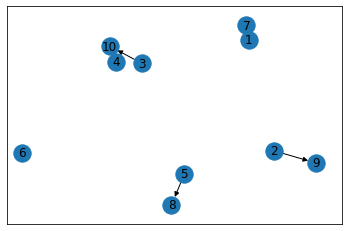

In [217]:
# Very sparse planted approximate graph
G, nodes = planted_approximate_bipartipe(10,1,w=0.5,pl=0.2)


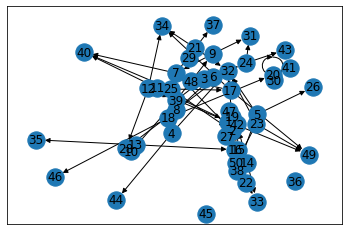

In [232]:
# Less sparse planted approximate graph
G, nodes = planted_approximate_bipartipe(50,3,w=0.5,pl=0.2)


### Created a non -perturbated bipartipe graph

The non perturbated bipartipe graph is supposedely easier to create than the perturbated one. We want two set that are related by directed edges in a unique direction. However, even with those directed bipartipe exact graph, we can still obtain solutions that are non exact by changing the size of the set and implement a maximum cut problem which change the size of the problem. Below, we create a bipartipe graph where the size of each group can be modified optionally. 
 
Some research should be done on the conditions to obtain an exact solution. 


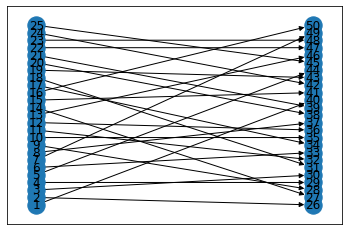

In [260]:
def exact_bipartipe_graph(N,dens,w=0.5):
    ## This function takes as arguments: 
    ##  N : number of nodes to put in the graph
    ##  dens: density of the number of edges on the graph. This parameter guide how many outgoing edges there are for a node in the set A 
    ##  w: the weight of the size of the set A. It is set by default to 0.5, which is equal weight. 
    ## This function create a Nx directed graph G which has a bipartipe structure. The direction of the edge is from 
    ## A to B, where nodes 1 to w*N belongs to A and nodes N*w to N belong to B. 
    ## This function returns: 
    ##  G: the graph created
    ## and draws the graph created with label on the nodes
        
    # Create empty graph
    G = nx.DiGraph()
    # Add nodes to the graph
    for i in range(1,N):
        G.add_nodes_from([i,i+1])

    # Create 2 sets : Nodes 1-N/2 belong to A, and nodes N/2+1 to N belong to B, in this fashion I know which nodes belong to what
    setA = list(range(1,int(N*w)+1))
    setB = list(range(int(N*w)+1,N+1))
    setAdensity=setA * dens #I create a list which is [1,2,3,1,2,3,1,2,3] to increase the density of directed edges. 
    setBdensity=setB * dens #I create a list which is [1,2,3,1,2,3,1,2,3] to increase the density of directed edges. 

    #Go through each node of A and find a matching node in B
    for (i) in setAdensity:
        ind_j = np.random.randint(0,len(setBdensity)) #take a random index of the set A
        j = setBdensity[ind_j] #select a random element of the set A 
        G.add_edges_from([(i,j)]) #add a directed edge from i to j
        setBdensity.pop(ind_j) #withdraw the matched nodes from the list of nodes in B

    # Draw the graph created
    pos=nx.spring_layout(G) # Draw the directed edges
    nx.draw_networkx(G,pos=nx.bipartite_layout(G, setA)) #Draw the directed edges and nodes
    labels = nx.get_edge_attributes(G,'weight') #create the labels (name of the nodes)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #add the label to the plot
    
    return G, setA
    
G, nodes = exact_bipartipe_graph(50,1,w=0.5)

### Implement the spectual algorithm

In [253]:
import numpy as np

def new_mapping(A):
    ''' Compute the new mapping f(A) for the adjacency matrix A of the network.
    '''
    # Compute the SVD decompostion.
    u, s, v = np.linalg.svd(A, full_matrices=True)

    
    # Compute f(A).
    fA = u @ diag(np.cosh(s)) @ u.T - u @ diag(np.sinh(s)) @ v
    return fA

In [254]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

/var/folders/m7/0c6k6n3j4dl5gy8xc8rjf3jm0000gn/T/ipykernel_14208/1343770704.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


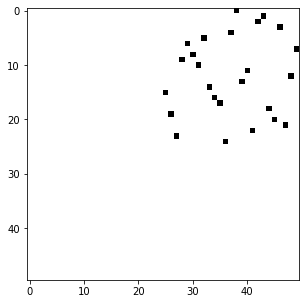

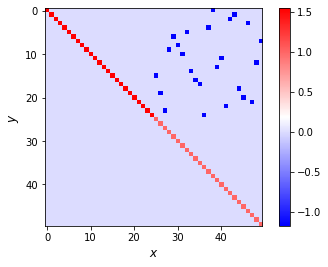

In [255]:
import matplotlib.pyplot as plt

draw_adjacency_matrix(G)

# Compute the adjacency matrix A.
A = nx.adjacency_matrix(G)
#print(A.todense())

# Compute f(A).
fA = new_mapping(A.todense())
#print(fA)

# Create a figure
fig, ax = plt.subplots()

# Plot the heatmap
#plt.imshow(A.todense(), cmap='cool', interpolation='nearest')
#plt.colorbar()
#plt.plot(A.todense())

#plt.show()

plt.imshow(fA, cmap='bwr', interpolation='nearest')
plt.colorbar()

# Set axis properties
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)



plt.show()


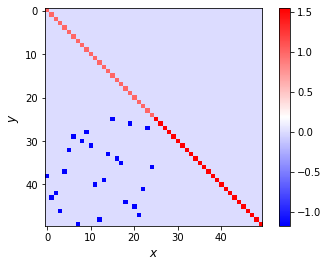

In [256]:
# Compute f(A).
fAT = new_mapping(A.todense().T)
#print(fAT)

# Create a figure
fig, ax = plt.subplots()

# Plot the heatmap
#plt.imshow(A.todense(), cmap='cool', interpolation='nearest')
#plt.colorbar()
#plt.plot(A.todense())

#plt.show()

plt.imshow(fAT, cmap='bwr', interpolation='nearest')
plt.colorbar()

# Set axis properties
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)



plt.show()

[[ 2.54e+000  0.00e+000  0.00e+000 ...  0.00e+000 -1.16e-192 -1.17e-112]
 [ 1.37e-048  2.54e+000  0.00e+000 ...  0.00e+000 -1.16e-176 -1.17e-096]
 [ 1.52e-064  0.00e+000  2.54e+000 ...  0.00e+000 -1.17e-160 -1.17e-080]
 ...
 [ 0.00e+000  0.00e+000  0.00e+000 ...  2.54e+000  0.00e+000  0.00e+000]
 [ 0.00e+000  0.00e+000  0.00e+000 ...  0.00e+000  2.54e+000  0.00e+000]
 [ 0.00e+000  0.00e+000  0.00e+000 ...  0.00e+000  0.00e+000  2.54e+000]]


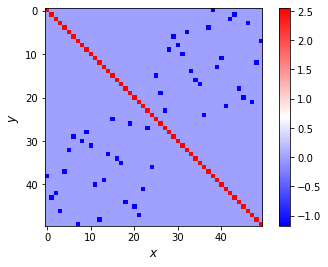

In [257]:
M = fA + fAT

print(M)

# Create a figure
fig, ax = plt.subplots()

# Plot the heatmap
#plt.imshow(A.todense(), cmap='cool', interpolation='nearest')
#plt.colorbar()
#plt.plot(A.todense())

#plt.show()

plt.imshow(M, cmap='bwr', interpolation='nearest')
plt.colorbar()

# Set axis properties
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)

plt.show()

### Use SPONGE for clustering

In [258]:
from signet.cluster import Cluster
import numpy as np
from scipy.sparse import csc_matrix

# Preprocess f to construct Cluster object.
M_csc = csc_matrix(M)
M_bar = abs(M_csc)
M_p = (M_csc + M_bar) / 2
M_n = - (M_csc - M_bar) / 2

M_p.eliminate_zeros()
M_n.eliminate_zeros()

C = Cluster((M_p, M_n))

pcapreds = C.SPONGE_sym(2)
print(pcapreds)

#rscore = sm.adjusted_rand_score(truth, pcapreds)
#print('SPONGE core is ', rscore)

[0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 1 1 0 1 1 1 1 0]


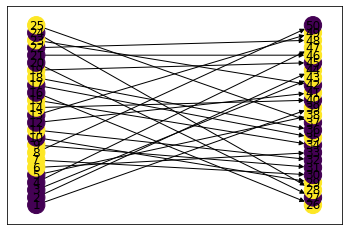

In [259]:
nx.draw_networkx(G, node_color=pcapreds, pos=nx.bipartite_layout(G, nodes)) #Draw the directed edges and nodes